# Projeto MTR

0. Pegar o dataset de heart disease (e possivelmente de airbnb)
1. Manipular os dados para deixá-los prontos para treinamento por modelos de ML 
2. Pesquisar e escolher os modelos para serem testados (de preferência modelos que sabemos ter erros correlacionados)
3. Treinar modelos (tentar achar os melhores hiperparâmetros, usar validação cruzada de 5 ou 10 folds)
4. Construir assessores (treinados para tentar prever o erro dos modelos) (também tentar achar melhores hiperparâmetros):

    4.1. Um assessor para cada modelo (RandomForestRegressor ou algum outro)
    
    4.2. Um assessor multi-target para todos os modelos (RegressorChains (outputs relacionados) **e** Single Target Method (outputs independentes))
    
    4.3. Um assessor para cada "família" ou grupo de modelos de ML com erros correlacionados (RegressorChains)

5. Coletar resultados e tirar conclusões para apresentar

## Imports e funções

In [ ]:
from .utils import *

# Datasets

In [2]:
seed = randint(0, 4294967295)
print(seed)

1517446106


## Heart Statlog

**Attribute Information:**

- 1. age       
- 2. sex       
- 3. chest pain type  (4 values)       
- 4. resting blood pressure  
- 5. serum cholestoral in mg/dl      
- 6. fasting blood sugar > 120 mg/dl       
- 7. resting electrocardiographic results  (values 0,1,2)
- 8. maximum heart rate achieved  
- 9. exercise induced angina    
- 10. oldpeak = ST depression induced by exercise relative to rest   
- 11. the slope of the peak exercise ST segment     
- 12. number of major vessels (0-3) colored by flourosopy        
- 13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

**Attributes types:**

Real: 1,4,5,8,10,12

Ordered:11,

Binary: 2,6,9

Nominal:7,3,13

**Variable to be predicted:**

Absence (1) or presence (2) of heart disease

In [18]:
cols = ['age', 'sex', 'chest_pain', 'blood_pressure', 
        'cholestoral', 'blood_sugar', 'eletro_results',
        'max_heart_rate', 'exer_angina', 'oldpeak',
        'slope_peak', 'major_vessels', 'thal']

dfh = pd.read_csv('data/heart/heart.dat', names=cols+['target'], sep=' ')

dfh['target'] = dfh['target'].apply(lambda x: 1 if x==2 else 0)

print(f'Nº de instâncias: {len(dfh)}')
dfh.head()

Nº de instâncias: 270


,age,sex,chest_pain,blood_pressure,cholestoral,blood_sugar,eletro_results,max_heart_rate,exer_angina,oldpeak,slope_peak,major_vessels,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0


<Axes: >

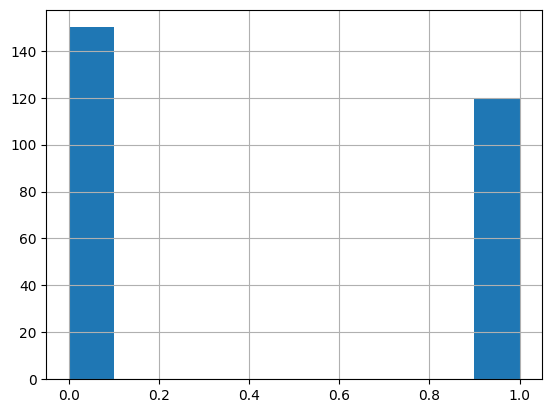

In [4]:
dfh['target'].hist()

<Axes: >

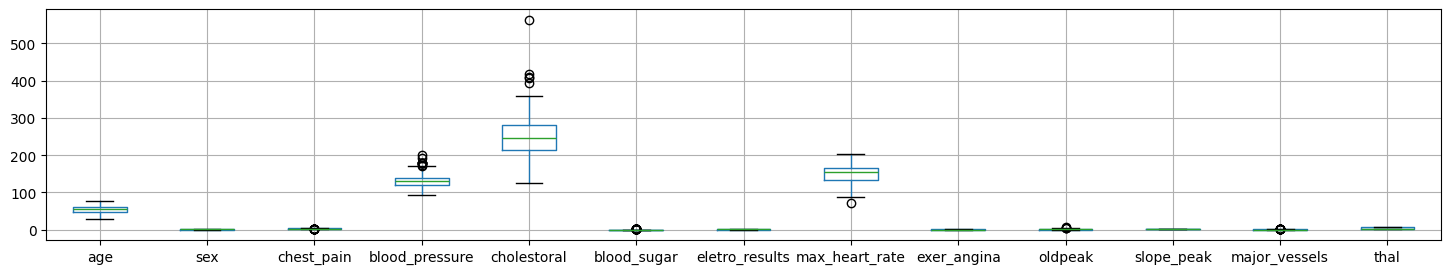

In [19]:
plt.figure(figsize=(18,3))
dfh[cols].boxplot()

<Axes: >

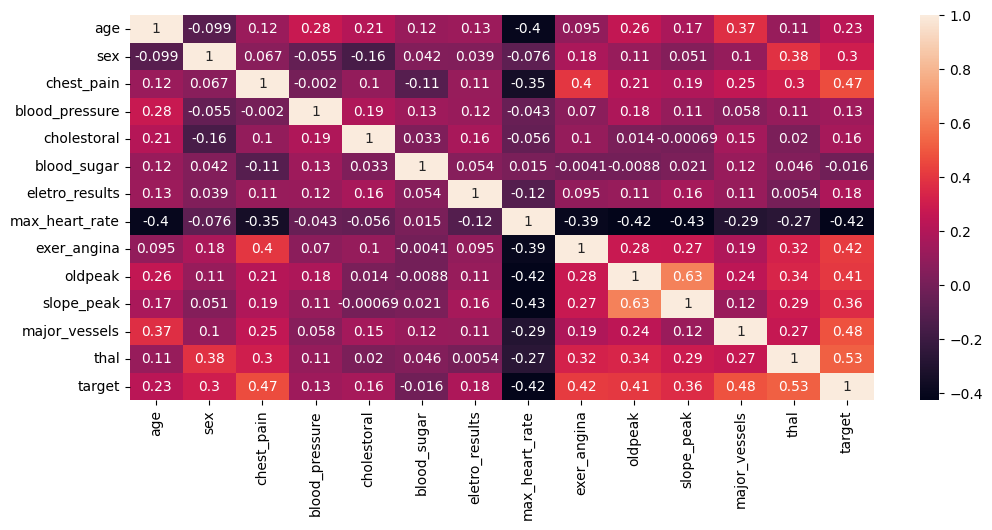

In [20]:
plt.figure(figsize=(12,5))
sns.heatmap(dfh.corr('spearman'), annot=True)

correlação regular entre:
- target e [chest_pain, max_heart_rate, exer_angina, oldpeak, major_vessels, thal]
- chest_pain e exer_angina
- max_heart_rate e [age, oldpeak, slope_peak]
- oldpeak e slope_peak

In [ ]:
# 1/3 | 1/3 | 1/3
BASE_ASSESSOR_SPLIT = 0.3
BASE_TEST_SIZE = 0.5

temp = dfh[dfh.target==1]
train_pos, test_pos = train_test_split(temp, test_size=BASE_ASSESSOR_SPLIT, shuffle=True, random_state=seed)

temp = dfh[dfh.target==0]
train_neg, test_neg = train_test_split(temp, test_size=BASE_ASSESSOR_SPLIT, shuffle=True, random_state=seed)

X_trainBH, X_testBH, y_trainBH, y_testBH = train_test_split(pd.concat([train_pos[cols], train_neg[cols]], ignore_index=True), # X
                                                            pd.concat([train_pos['target'], train_neg['target']], ignore_index=True), # y
                                                            test_size=BASE_TEST_SIZE, shuffle=True, random_state=seed)

X_testAH = pd.concat([test_pos[cols], test_neg[cols]], ignore_index=True)
y_testAH = pd.concat([test_pos['target'], test_neg['target']], ignore_index=True)

In [ ]:
scaler = StandardScaler()

X_trainBH_norm = scaler.fit_transform(X_trainBH, y_trainBH)
X_testBH_norm = scaler.transform(X_testBH)

# se eu fosse normalizar os dados de teste do assessor, eu usaria o mesmo scaler?

## Base Models

### Decision Tree

In [ ]:
dtreeH = 

### Stochastic Gradient Descent
(SGD)

### Logistic Regression

### K-Nearest Neighbors

(KNN)

### Support Vector Machine - Linear
(SVM)

### Support Vector Machine - Polynomial
(SVM)

### Support Vector Machine - RBF
(SVM)

### Multi-Layer Perceptron
(MLP)

### Kolmogorov-Arnold Network
(KAN)

### Random Forest

### Gradient Boosting

### AdaBoost

### XGBoost

## Airbnb

In [ ]:
dfa = pd.read_csv('data/airbnb/listings.csv')

print(f'Nº de instâncias: {len(dfa)}')
dfa.head()